<a href="https://colab.research.google.com/github/valenderval/MLA_JFV/blob/main/MLA4_JFV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment 4
Jacob Vallery <br>CS430-ON <br>Machine Learning in the Cloud

#Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Imports for Specific Models

In [3]:
from sklearn import tree
from sklearn.tree import export_text

#Imports for Splitting Data and Building Pipeline

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

#Imports for Performance Measures

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

#Confusion Matrix Function

In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

#ROC_Curve Function

In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

#Problem 1

#SVC Classification - Acquire Data

In [8]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

#Splitting Data into Train/Test

In [9]:
df.head(1)

,variance,skewness,curtosis,entropy,forgery
0,3.6216,8.6661,-2.8073,-0.44699,0


In [10]:
X = df.drop(columns=['forgery'])
y = df['forgery']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

#Building the Pipeline

In [12]:
num_attribs = ['variance','skewness','curtosis','entropy']

In [13]:
col_transform = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(), num_attribs)],
                               remainder='passthrough')

In [14]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('decision_tree',tree.DecisionTreeClassifier(max_depth=5))
                     ])

#Executing the Model

In [15]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('decision_tree', DecisionTreeClassifier(max_depth=5))])

#Evaluating the Model

In [16]:
y_pred = pipeline.predict(X_test)

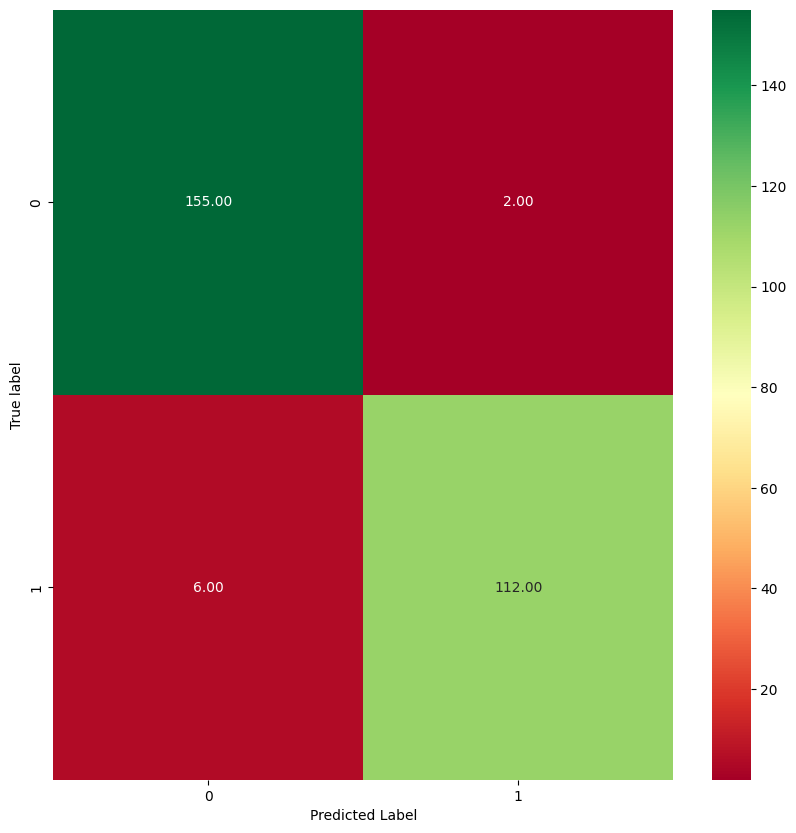

In [17]:
plot_cm(y_test,y_pred)

In [18]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.9824561403508771
0.9491525423728814
0.9655172413793104


 These results tell us that about 98.2% of the positive predictions made by this model are correct, the model correctly identifies about 94.9% of all actual positive cases, and a score of 0.966 says that this model has a good balance between precision and recall.<br>
**This indicates that this model is performing well.**


#Conclusion

This model is suitable and reliable for predicting whether or not a banknote is a forgery. With such high scores in precision and recall, the risk for false positives is minimized, and the risk of false negatives is reduced. The high F1 score supports that there is also a good trade-off between precision and recall.<br> **This indicates that this model is accurate and effective in identifying banknote forgery.**

#Acquire Data

In [19]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')

In [20]:
df.rename(columns={'Usage_kWh': 'usage_kwh'}, inplace=True)
df.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'lag_react_pwr_kvarh'}, inplace=True)
df.rename(columns={'Leading_Current_Reactive_Power_kVarh': 'lead_react_pwr_kvarh'}, inplace=True)
df.rename(columns={'Lagging_Current_Power_Factor': 'lag_current_pwr'}, inplace=True)
df.rename(columns={'Leading_Current_Power_Factor': 'lead_current_pwr'}, inplace=True)
df.rename(columns={'NSM': 'nsm'}, inplace=True)
df.rename(columns={'WeekStatus': 'week_status'}, inplace=True)
df.rename(columns={'Day_of_week': 'day_of_week'}, inplace=True)
df.rename(columns={'Load_Type': 'load_type'}, inplace=True)

#Splitting Data into Train/Test

In [21]:
X = df.drop(columns=['date', 'usage_kwh'])

y = df['usage_kwh']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

#Building the Pipeline

In [23]:
num_attribs = ['lag_react_pwr_kvarh','lead_react_pwr_kvarh','CO2(tCO2)','lag_current_pwr','lead_current_pwr']
cat_attribs = ['week_status', 'day_of_week', 'load_type']

In [24]:
col_transform = ColumnTransformer(transformers=[
                               ('cat',OneHotEncoder(), cat_attribs),
                               ('num',MinMaxScaler(), num_attribs)],
                               remainder='passthrough')

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('regressor', DecisionTreeRegressor(random_state=0))
                     ])

#Executing the Model

In [27]:
pipeline.fit(X_train,np.ravel(y_train))

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr'])])),
                ('regressor', DecisionTreeRegressor(random_state=0))])

#Evaluating the Model

In [28]:
y_pred = pipeline.predict(X_test)

In [29]:
y_train_pred =  pipeline.predict(X_train)

In [30]:
print(mean_squared_error(y_test, y_pred)**(0.5))
print(mean_squared_error(y_train, y_train_pred)**(0.5))

1.250132116305784
2.522734059135841e-16


In a Markdown comment below the result, interpret the output you receive.


#Conclusion

In a Markdown comment, write a conclusion on how suitable you think this model is for predicting kwh usage.